In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
np.random.seed(42)

## Week 10: Web Maps, Observable, and Javascript
April 10, 2019

## Housekeeping

- Graded assignments #1 through #3 — solutions posted
- Assignment #6 (last HW before final project) will go out on Friday
    - Part 1: Proposal for final project 
    - Part 2: Interactive web maps + Leaflet

## Proposal for the final project

- 1/2 to 1 page outlining of plan for the final project
- Focus:
    - the data set, 
    - the questions you want to explore
    - the analysis methods/techniques you'll use
- More clarity on the web-based piece of the final project in coming lectures
- More details in the HW description

## Last week

- Clustering in Python with scikit-learn
- Two algorithms: KMeans and DBSCAN
- Use cases:
    - Clustering neighborhoods by Airbnb listings with KMeans
    - Identifying patterns in NYC taxi rides with DBSCAN

## Today: Web maps, Observable, and Javascript

- Introduction to Leaflet.js: open-source interactive web maps
- Part 1: using Leaflet in Python with Folium
- Part 2: the benefits of using Javascript directly
    - Observable: notebooks in Javascript
    - A gentle introduction to Javascript
    - Unlocking the full power of Leaflet.js

## Examples

- Internet availability for US counties from census data
- Dynamically mapping shootings in Philadelphia 

## No new packages to install this week

Everything should be installed already!

## Interactive maps in Python

Haven't we already done this?

## Yes!

We've used holoviews/geoviews/datashader to create interactive map-based visualizations

## Why do we need something more?

<img src="imgs/leaflet.png" width=500></img>

## The benefits of Leaflet

- The leading open-source mapping library
- Simple and powerful
- Leverage the open-source community and lots of powerful plugins

## Folium: Leaflet in Python

**Pros**
- Create Leaflet.js maps directly from Python
- Combine power of Leaflet.js with the data wrangling ease of Python

**Cons**
- A wrapper for **most, but not all** of Leaflet's functionality
- Can be difficult to debug and find errors

## Let's start with a quick example: OSMnx

OSMnx leverages Folium under the hood to make interactive graphs of street networks!

In [2]:
import osmnx as ox
import networkx as nx

Load the street network around City Hall

In [3]:
G = ox.graph_from_address('City Hall, Philadelphia, USA', 
                          distance=1500, network_type='drive')

**Key function:** `ox.plot_graph_folium` will make an interactive map of the graph object

In [4]:
# plot the street network with folium
graph_map = ox.plot_graph_folium(G, 
                                 popup_attribute='name', 
                                 edge_width=2)

And now save the map object and load it into the Jupyter notebook

In [5]:
from IPython.display import IFrame # loads HTML files

In [6]:
ox.plot_graph_folium?

In [7]:
filepath = 'graph.html'
graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

## Example 2: interactive maps of network routes

We can overlay the shortest route between two nodes on the folium map.

In [8]:
# use networkx to calculate the shortest path between two nodes
nodes = list(G.nodes())
origin_node = nodes[0]
destination_node = nodes[-1]
route = nx.shortest_path(G, origin_node, destination_node)

**Key function**: use `ox.plot_route_folium` to plot the route.

In [9]:
# plot the route with folium
route_map = ox.plot_route_folium(G, route)

In [10]:
filepath = 'route.html'
route_map.save(filepath)
IFrame(filepath, width=600, height=500)

We can also add the underlying street network graph

In [11]:
# plot the route with folium on top of the previously created graph_map
route_graph_map = ox.plot_route_folium(G, route, 
                                       route_map=graph_map)

In [12]:
# save as html file then display map as an iframe
filepath = 'route_graph.html'
route_graph_map.save(filepath)
IFrame(filepath, width=600, height=500)

Note the `Leaflet` annotation in the bottom right corner of the maps...

## Getting started with Folium

**Things we'll cover:**
1. Creating a base map with tiles
1. Overlaying GeoJSON polygons
1. Plotting an interactive choropleth

In [13]:
import folium

## 1. Creating a Folium map

**Key function:** `folium.Map`

## Lots of configuration options

Some key ones: 
- **location**: the center location of the map
- **zoom_start**: the initial zoom level of the map
- **tiles**: the name of the tile provider 

Let's take a look at the help message:

In [14]:
folium.Map?

## The default tiles: OpenStreetMap

In [15]:
# let's center the map on Philadelphia
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11
)

m

In [16]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
     tiles='stamenwatercolor'
)

m

## Using custom tile sets

- Many sites provide free tile sets for download
- Just need the URL of the tile server
- Very useful demo of tile providers: https://leaflet-extras.github.io/leaflet-providers/preview

Let's try out the ESRI World Map:

**Important: for custom tile providers, you need to specify the attribution too!** 

In [17]:
tile_url = 'https://server.arcgisonline.com/ArcGIS/rest/services/World_Street_Map/MapServer/tile/{z}/{y}/{x}'
attr = 'Tiles &copy; Esri &mdash; Source: Esri, DeLorme, NAVTEQ, USGS, Intermap, iPC, NRCAN, Esri Japan, METI, Esri China (Hong Kong), Esri (Thailand), TomTom, 2012'

In [18]:
m = folium.Map(
    location=[39.99, -75.13],
    zoom_start=11,
    tiles=tile_url,
    attr=attr
)

m

## 2. Overlaying GeoJSON on a folium map

**Key function:** `folium.GeoJson`

**Key parameters:**
- `style_function`: set the default style of the features
- `highlight_function`: set the style when the mouse hovers over the features 
- `tooltip`: add a tooltip when hovering over a feature

In [86]:
folium.GeoJson?

In [87]:
folium.GeoJsonTooltip?

## Example: Philadelphia ZIP codes

In [19]:
# Open Data Philly
zip_url = "http://data.phl.opendata.arcgis.com/datasets/b54ec5210cee41c3a884c9086f7af1be_0.geojson"
zip_codes = gpd.read_file(zip_url)

In [20]:
zip_codes.head()

OBJECTID   CODE  COD   Shape__Area  Shape__Length  \
0         1  19120   20  9.177970e+07   49921.544063   
1         2  19121   21  6.959879e+07   39534.887217   
2         3  19122   22  3.591632e+07   24124.645221   
3         4  19123   23  3.585175e+07   26421.728982   
4         5  19124   24  1.448080e+08   63658.770420   

                                            geometry  
0  POLYGON ((-75.1110653346439 40.0468227016961, ...  
1  POLYGON ((-75.19226912130721 39.9946274220628,...  
2  POLYGON ((-75.1540648269043 39.9860126588003, ...  
3  POLYGON ((-75.15189626724511 39.9705604828569,...  
4  POLYGON ((-75.0966007476932 40.0424918523115, ...

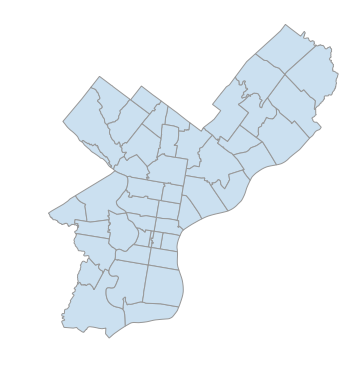

In [26]:
ox.plot_shape(ox.project_gdf(zip_codes));

Define functions to set the styles:

In [29]:
def get_style(feature):
    return {'weight': 2, 'color': 'white'}

def get_highlighted_style(feature):
    return {'weight': 2, 'color': 'red'}

## Usual Leaflet/Folium syntax

1. Create the map
2. Create your overlay layer
3. Add your overlay layer to your map

In [30]:
# create the map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb dark_matter',
    zoom_start=11
)

# add the GeoJson to the map
folium.GeoJson(
    zip_codes.to_json(),
    name='Philadelphia ZIP_codes',
    style_function=get_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['CODE'])
).add_to(m)

# also add option to toggle layers
folium.LayerControl().add_to(m)

m

## Important notes:

- The data should be passed as GeoJSON rather than a GeoDataFrame — you need to call `.to_json()`
- I've added a `LayerControl` to toggle different layers on the map
- I've specified a tooltip using `folium.GeoJsonTooltip`

## 3. Plotting a choropleth map

Overlay GeoJSON features on an interactive map, colored by a specific data variable

## Let's load some census data

- The (brand new) `census-data-downloader` package is a very good source for processed census data for some of the most popular tables
- Processed CSV files are stored on GitHub and can be easily downloaded
- From the data team at the LA Times

https://github.com/datadesk/census-data-downloader

Load data from GitHub for internet availability in US counties:

In [31]:
census_url = "https://raw.githubusercontent.com/datadesk/census-data-downloader/master/data/processed/acs5_2017_internet_counties.csv"
census_data = pd.read_csv(census_url)

In [32]:
census_data.head()

geoid                                  name  total_households  \
0  72047        Corozal Municipio, Puerto Rico           11026.0   
1  72095        Maunabo Municipio, Puerto Rico            3976.0   
2  72111       Peñuelas Municipio, Puerto Rico            7132.0   
3  72113          Ponce Municipio, Puerto Rico           53341.0   
4  72131  San Sebastián Municipio, Puerto Rico           14278.0   

   total_with_computer  dialup_internet  broadband_internet  \
0               6202.0            174.0              4554.0   
1               2016.0              0.0              1419.0   
2               4250.0              0.0              3647.0   
3              31617.0            222.0             23702.0   
4               6741.0            130.0              4474.0   

   computer_no_internet  total_no_computer  county  state  \
0                1474.0             4824.0      47     72   
1                 597.0             1960.0      95     72   
2                 603.0             2882.0     111     72   
3                7693.0            21724.0     113     72   
4                2137.0             7537.0     131     72   

   total_with_internet  total_no_internet  
0               4728.0             6298.0  
1               1419.0             2557.0  
2               3647.0             3485.0  
3              23924.0            29417.0  
4               4604.0             9674.0

In [33]:
# remove counties with no households
valid = census_data['total_households'] > 0
census_data = census_data.loc[valid]

# calculate the percent without internet
census_data['percent_no_internet'] = census_data['total_no_internet'] / census_data['total_households']

# make sure geoid is a string
census_data['geoid'] = census_data['geoid'].astype(str)

Load the US counties GeoJSON (from folium's GitHub):

In [34]:
url = "https://raw.githubusercontent.com/python-visualization/folium/master/tests/us-counties.json"
counties = gpd.read_file(url)

In [35]:
counties.head()

id     name                                           geometry
0  1001  Autauga  POLYGON ((-86.41178600000001 32.706342, -86.41...
1  1003  Baldwin  POLYGON ((-87.76459 31.298768, -87.616713 31.2...
2  1005  Barbour  POLYGON ((-85.354736 32.147694, -85.053504 32....
3  1007     Bibb  POLYGON ((-87.063542 33.248559, -87.025203 33....
4  1009   Blount  POLYGON ((-86.488463 34.261793, -86.455601 34....

## Now let's make the choropleth..

## The easy way: use folium.Choropleth

- **The good:** 
    - Automatically generate a choropleth from a set of features and corresponding pandas DataFrame
    - Automatic creation of a legend
- **The bad:** 
    - no tooltip and little highlight interactivity (currently being worked on)

In [36]:
folium.Choropleth?

In [105]:
m = folium.Map(location=[40, -98], zoom_start=4)

# column names to match on
data_id = 'geoid'
json_id = 'id'

folium.Choropleth(
    geo_data=counties.to_json(),
    name='choropleth',
    data=census_data,
    columns=[data_id, 'percent_no_internet'],
    key_on='feature.properties.%s' % json_id, # need to use the "feature.properties." syntax
    fill_color='RdPu', # any ColorBrewer name will work here
    fill_opacity=0.7,
    line_opacity=1,
    line_weight=0.5,
    legend_name='Households without Internet (%)'
).add_to(m)


m

## The hard way: use folium.GeoJson

- **The good:**
    - more customizable, and can add user interaction
- **The bad:**
    - requires more work
    - no way to add a legend, see [this open issue on GitHub](https://github.com/python-visualization/folium/issues/528)

## The steps involved

1. Join data and features
1. Define a function to style features based on data values
1. Create GeoJSON layer and add it to the map

## Step 1: Join the census data and features

In [37]:
census_joined = pd.merge(counties[['id', 'geometry']], census_data, left_on='id', right_on='geoid')

In [38]:
census_joined.head()

id                                           geometry geoid  \
0  1001  POLYGON ((-86.41178600000001 32.706342, -86.41...  1001   
1  1003  POLYGON ((-87.76459 31.298768, -87.616713 31.2...  1003   
2  1005  POLYGON ((-85.354736 32.147694, -85.053504 32....  1005   
3  1007  POLYGON ((-87.063542 33.248559, -87.025203 33....  1007   
4  1009  POLYGON ((-86.488463 34.261793, -86.455601 34....  1009   

                      name  total_households  total_with_computer  \
0  Autauga County, Alabama           21054.0              18145.0   
1  Baldwin County, Alabama           76133.0              66174.0   
2  Barbour County, Alabama            9191.0               6747.0   
3     Bibb County, Alabama            6916.0               5176.0   
4   Blount County, Alabama           20690.0              16175.0   

   dialup_internet  broadband_internet  computer_no_internet  \
0             70.0             16055.0                2020.0   
1            604.0             56510.0                9060.0   
2            132.0              5187.0                1428.0   
3             21.0              4270.0                 885.0   
4            275.0             13499.0                2401.0   

   total_no_computer  county  state  total_with_internet  total_no_internet  \
0             2909.0       1      1              16125.0             4929.0   
1             9959.0       3      1              57114.0            19019.0   
2             2444.0       5      1               5319.0             3872.0   
3             1740.0       7      1               4291.0             2625.0   
4             4515.0       9      1              13774.0             6916.0   

   percent_no_internet  
0             0.234112  
1             0.249813  
2             0.421282  
3             0.379555  
4             0.334268

## Step 2: Normalize the data column to 0 to 1

We will use a matplotlib colorbar and it requires data to be between 0 and 1

In [39]:
x = census_joined['percent_no_internet']
census_joined['percent_no_internet_normalized'] = (x - x.min()) / (x.max() - x.min())

## Step 3: Define a style function

- create a matplotlib colorbar
- based on the feature data, evaluate the colorbar and convert to a hex string

In [40]:
import matplotlib.colors as mcolors

In [41]:
# use a red-purple colorbrewer color scheme
colorbar = plt.get_cmap('RdPu')

def get_style(feature):
    # get the data value from the feature
    value = feature['properties']['percent_no_internet_normalized']
    
    # evaluate the color bar 
    rgb_color = colorbar(value) # this is a RGB tuple
    
    # convert to hex string
    color = mcolors.rgb2hex(rgb_color)
    
    # return the style dictionary
    return {'weight': 0.25, 'color': color, 'fillColor': color, "fillOpacity": 0.75}

## Step 4: Convert our data to GeoJSON

**Be sure to only keep the data columns we'll actually use!**

In [42]:
needed_cols = ['name', 'percent_no_internet', 'percent_no_internet_normalized', 'geometry']
census_json = census_joined[needed_cols].to_json()

In [43]:
# initialize the map
m = folium.Map(location=[40, -98], zoom_start=4)

# add the GeoJson to the map
folium.GeoJson(
    census_json,
    name='choropleth',
    style_function=get_style,
    highlight_function=get_highlighted_style,
    tooltip=folium.GeoJsonTooltip(['name', 'percent_no_internet'])
).add_to(m)


folium.LayerControl().add_to(m)

# avoid a rendering bug by saving as HTML and re-loading
m.save('percent_no_internet.html')

## And viola! 

The hard way is **harder**, but we have a tooltip and highlight interactivity!

In [44]:
IFrame('percent_no_internet.html', width=800, height=500)

## Exercise: Can we repeat this with altair?

Try to replicate the above interactive map exactly (minus the background tiles). This includes:

- Using the blue purple colorbrewer scheme
- Having a tooltip with the percentage and county name

**Hints**
- As we have done before, you'll need to use `alt.InlineData` as your data object that is passed to the Chart
- See [altair documentation](https://altair-viz.github.io/user_guide/customization.html#color-schemes) on changing the color scheme and the [Vega documentation](https://vega.github.io/vega/docs/schemes/#reference) for the names of the allowed color schemes in altair
- You'll want to specify the projection type as "albersUsa" 

In [45]:
import altair as alt
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

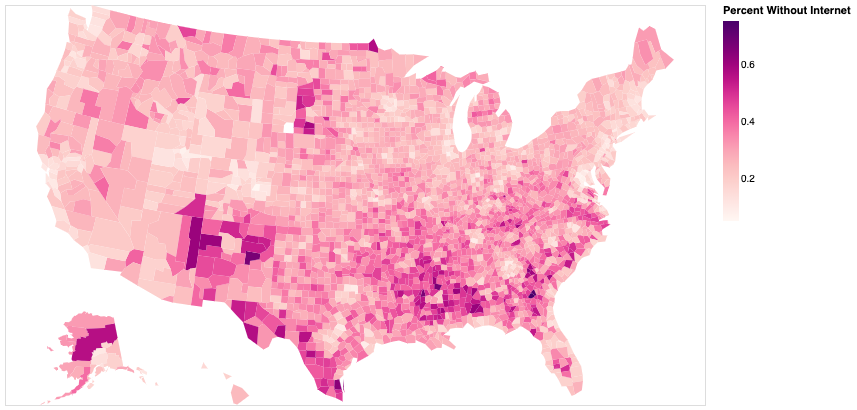

In [47]:
data  = alt.InlineData(values=census_json,
                       format=alt.DataFormat(property='features',type='json'))

# plot map, where variables ares nested within `properties`, 
alt.Chart(data).mark_geoshape().properties(
    width=700,
    height=400,
    projection={"type":'albersUsa'},
).encode(
    tooltip=[alt.Tooltip('properties.name:N', title='Name'), 
             alt.Tooltip('properties.percent_no_internet:Q', 
                         title="Percent Without Internet",
                        format=".1%")
            ],
    color=alt.Color('properties.percent_no_internet:Q', 
                    title="Percent Without Internet", 
                    scale=alt.Scale(scheme='redpurple'))
)


## Leaflet/Folium plugins

One of leaflet's strengths: a rich set of open-source plugins

https://leafletjs.com/plugins.html

Many of these are available in Folium!

## Example: Heatmap

In [48]:
from folium.plugins import HeatMap

## Let's pull shooting data in Philadelphia in the last 90 days

https://www.opendataphilly.org/dataset/shooting-victims

Let's query the database API directly to get the GeoJSON.

API documentation: https://cityofphiladelphia.github.io/carto-api-explorer/#shootings

In [49]:
import requests
import json

In [50]:
# the base URL
url = "https://phl.carto.com/api/v2/sql"

# get the SQL query
query = "SELECT * FROM shootings WHERE date_ >= current_date - 90"

# get the response
r = requests.get(url, params={'q': query, 'format':'geojson'})

In [53]:
r

<Response [200]>

In [54]:
d = json.loads(r.text)

In [55]:
d

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-75.127644, 40.030794]},
   'properties': {'cartodb_id': 3025,
    'objectid': 67856,
    'year': 2019,
    'dc_key': '201935017904',
    'code': '0111',
    'date_': '2019-02-28T00:00:00Z',
    'race': 'B',
    'sex': 'M',
    'age': '24',
    'wound': 'head/multi',
    'officer_involved': 'N',
    'offender_injured': 'N',
    'offender_deceased': 'N',
    'location': '200 BLOCK W Wellens St',
    'latino': 0,
    'point_x': -75.12764416,
    'point_y': 40.0307945,
    'dist': '35',
    'time': '18:13:00',
    'inside': 0,
    'outside': 1,
    'fatal': 1}},
  {'type': 'Feature',
   'geometry': {'type': 'Point', 'coordinates': [-75.150152, 39.999565]},
   'properties': {'cartodb_id': 3026,
    'objectid': 73932,
    'year': 2019,
    'dc_key': '201925022748',
    'code': '0411',
    'date_': '2019-03-23T00:00:00Z',
    'race': 'B',
    'sex': 'M',
    'age': '22',
    'woun

In [56]:
# convert to a GeoDataFrame
features = gpd.GeoDataFrame.from_features(json.loads(r.text))

In [57]:
# remove missing
features = features.loc[features.geometry.notnull()]

In [58]:
features.head()

age  cartodb_id  code                 date_        dc_key dist  fatal  \
0  24        3025  0111  2019-02-28T00:00:00Z  201935017904   35      1   
1  22        3026  0411  2019-03-23T00:00:00Z  201925022748   25      0   
2  26        3027  0300  2019-03-23T00:00:00Z  201925023007   25      0   
3  25        3028  0111  2019-03-22T00:00:00Z  201919023050   19      1   
4  16        3029  0411  2019-03-22T00:00:00Z  201912022259   12      0   

                               geometry  inside  latino  ... offender_injured  \
0          POINT (-75.127644 40.030794)       0       0  ...                N   
1  POINT (-75.15015200000001 39.999565)       0       0  ...                N   
2            POINT (-75.147533 40.0009)       0       0  ...                N   
3          POINT (-75.226434 39.974263)       0       0  ...                N   
4          POINT (-75.229702 39.932157)       0       0  ...                N   

   officer_involved outside    point_x    point_y  race  sex      time  \
0                 N       1 -75.127644  40.030794     B    M  18:13:00   
1                 N       1 -75.150152  39.999565     B    M  01:08:00   
2                 N       1 -75.147533  40.000900     B    M  22:36:00   
3                 N       1 -75.226434  39.974263     B    M  09:15:00   
4                 N       1 -75.229702  39.932157     B    M  19:05:00   

        wound  year  
0  head/multi  2019  
1         arm  2019  
2      finger  2019  
3       torso  2019  
4       multi  2019  

[5 rows x 23 columns]

## Now let's make our heatmap

We need an array of (latitude, longitude) pairs.

In [59]:
# extract the lat and longitude from the geometery column
features['lat'] = features.geometry.y
features['lng'] = features.geometry.x

# make a NumPy array (use the "values" attribute)
coordinates = features[['lat', 'lng']].values

In [60]:
coordinates[:5]

array([[ 40.030794, -75.127644],
       [ 39.999565, -75.150152],
       [ 40.0009  , -75.147533],
       [ 39.974263, -75.226434],
       [ 39.932157, -75.229702]])

In [61]:
# initialize map
m = folium.Map(
    location=[39.99, -75.13],
    tiles='Cartodb Positron',
    zoom_start=11
)


# add heat map
HeatMap(coordinates).add_to(m)

m

## Part 2: A gentle introduction to Javascript

## Enter Observable

https://observablehq.com/

- Created by Mike Bostock, of d3 and NYTimes fame
- Very similar to Jupyter notebooks...but for Javascript.
- Relatively new, but very powerful

## A few reasons Observable is awesome

For more info: https://observablehq.com/@palewire/five-reasons-to-write-your-first-observable-notebook

## 1. No installation neccessary

Setting up a Javascript development is one the biggest barriers to using Javascript. Now, we can just open up a notebook and start hacking away.

## 2. Builtin reactivity

Change one cell, and all the cells up date to reflect the change! Definitely feels like magic...

## 3. Easy user interactivity

Builtin widgets, sliders, dropdowns, buttons, etc will let the user change the page dynamically.

## 4. Everything is importable

Creates an open-source community where you're able to build on the work of others and re-use past results

## 5. A powerful environment for tinkering and prototyping with complex visualizations

Easily construct and polish very complex visualizations...and then embed them in HTML and put them on your website. 

**More on this in the coming weeks**

## Let's see some examples

https://observablehq.com/

## The Observable workflow

Fork, share, merge

https://observablehq.com/@observablehq/fork-share-merge

You can fork any notebook and start editing to make changes

## A quick primer

Courtesy of the Univ. of Washington's Interactive Data Lab

https://observablehq.com/@nickhand/a-minimal-introduction-to-javascript-and-observable

Fork and follow along!

## Additional reference

[The Observable User Manual](https://observablehq.com/@observablehq/observable-user-manual)

## Now onto Leaflet

  - Documentation: https://leafletjs.com
  - Tutorials: https://leafletjs.com/examples.html

## A few notebook examples

## Introduction to Leaflet 

https://observablehq.com/@nickhand/leaflet

## Mapping shootings in Philadelphia

https://observablehq.com/@nickhand/shootings-in-philadelphia

## Internet availability for US counties

https://observablehq.com/@nickhand/internet-availability-for-us-counties

## Exercise: Mapping pothole requests in Philadelphia

Create a notebook that queries the Open Data Philly API to pull 311 requests related to potholes and maps them using Leaflet. 

Similar to the shootings notebook, include: 

- Pothole requests visualized as markers on a Leaflet map
- A map showing a heatmap of pothole requests
- A slider widget to determine the time period over which to select requests

The API documentation for this database can be found here: https://www.opendataphilly.org/dataset/311-service-and-information-requests/resource/ebfbb457-0472-4832-a7e3-ad288de856be

## Next time: advanced data viz

- Observable, d3, Vega
- Embedding charts on the web